<a href="https://colab.research.google.com/github/anamika2000/fashion_MNIST/blob/main/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
label= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
x_train=x_train/255.0
x_test=x_test/255.0

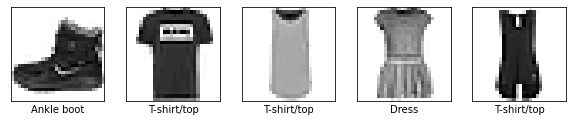

In [6]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(label[y_train[i]])

In [7]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

#convert the representation of label to 'one hot representation'
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(20, (5,5), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(50, (5,5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1225500   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
             loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train, epochs=10,batch_size=60)

Epoch 1/10
1000/1000 [==============================] - 105s 104ms/step - loss: 0.5859 - accuracy: 0.7854
Epoch 2/10
1000/1000 [==============================] - 104s 104ms/step - loss: 0.2810 - accuracy: 0.8981
Epoch 3/10
1000/1000 [==============================] - 104s 104ms/step - loss: 0.2341 - accuracy: 0.9130
Epoch 4/10
1000/1000 [==============================] - 104s 104ms/step - loss: 0.1936 - accuracy: 0.9285
Epoch 5/10
1000/1000 [==============================] - 104s 104ms/step - loss: 0.1637 - accuracy: 0.9379
Epoch 6/10
1000/1000 [==============================] - 104s 104ms/step - loss: 0.1366 - accuracy: 0.9489
Epoch 7/10
1000/1000 [==============================] - 104s 104ms/step - loss: 0.1173 - accuracy: 0.9565
Epoch 8/10
1000/1000 [==============================] - 104s 104ms/step - loss: 0.0974 - accuracy: 0.9636
Epoch 9/10
1000/1000 [==============================] - 104s 104ms/step - loss: 0.0824 - accuracy: 0.9695
Epoch 10/10
1000/1000 [=======================

In [13]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.3048 - accuracy: 0.9170


[0.304791659116745, 0.9169999957084656]

In [17]:
prediction=model.predict(x_test)
print(prediction[0])
labels=label[np.argmax(prediction[0])]
print(labels)
print(y_test[0])


[1.9587668e-10 4.0674644e-11 2.6403031e-13 3.0992575e-13 2.0645131e-11
 4.3100865e-10 1.1214367e-09 1.2393367e-06 5.8048794e-14 9.9999881e-01]
Ankle boot
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
